In [12]:
# Import the relevant modules
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure

## Reading in the dataset:

In [18]:
# Reading in the CSV file as a pandas df

filename = 'SpotifyAudioFeaturesNov2018.csv'
data=pd.read_csv(filename)
data.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,9
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,8


## Checking for Tidiness:

The dataset is tidy since it meets the definition of a tidy dataset which is:
- Each variable you measure should be in one column. 
- Each different observation of that variable should be in a different row. 
- Observational units form tables.

## Checking for Duplicates:

In [93]:
# Testing to see if, considering all variables, there is duplicates in the dataset --> No row duplicates
data.drop_duplicates().shape

(116372, 17)

## Checking for Missing Values:

In [8]:
# looking at the number of missing values --> There are no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116372 entries, 0 to 116371
Data columns (total 17 columns):
artist_name         116372 non-null object
track_id            116372 non-null object
track_name          116372 non-null object
acousticness        116372 non-null float64
danceability        116372 non-null float64
duration_ms         116372 non-null int64
energy              116372 non-null float64
instrumentalness    116372 non-null float64
key                 116372 non-null int64
liveness            116372 non-null float64
loudness            116372 non-null float64
mode                116372 non-null int64
speechiness         116372 non-null float64
tempo               116372 non-null float64
time_signature      116372 non-null int64
valence             116372 non-null float64
popularity          116372 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 16.0+ MB


## If there was missing values:

If there was missing values in variable 'variable', we could fill it using the syntax:

##### data['variable'] = data['variable'].fillna(some_value) 

The some_value value could be any value sunch as 0, a summary statistic (e.g. mean, median) or a string 

## Variable Definitions and Outliers:

The next step of the wrangling would be to understand the meaning of variables and examine the outliers. Other than Artist name, Track ID, Track name and Popularity (an integer between 0 and 100 that is calculated based on the number
of streams a song had) there are 13 variables in the dataset that characterize the audio features of each song. Te description of these variables is as follows:

**Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

**Danceability:** describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.      

**Duration_ms:** The duration of the track in milliseconds.        

**Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.              

**Instrumentalness:** Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.    

**Key:** The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. This particular dataset does not have any -1's.

**Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

**Loudness:** The overall loudness of a track in decibels (dB). Values typical range between -60 and 0 db, this this dataset contains values greater than 0 as well. As we will se below, these larger values are not considered 'outliers'.  

**Mode:** Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0. 

**Speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. 

**Tempo:** The overall estimated tempo of a track in beats per minute (BPM). 

**Time_signature:** An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, low angry).             




In [10]:
# Looking at summary statistics for audio features, which are all int or float type
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000
mean,0.335472,0.582476,212546.163940,0.571829,0.230127,5.239894,0.194196,-9.944835,0.607534,0.112204,119.603767,3.883005,0.438393,24.235082
std,0.343066,0.189869,124320.835566,0.258560,0.363406,3.603924,0.167389,6.503818,0.488302,0.124382,30.151621,0.508566,0.259566,17.931939
min,0.000000,0.000000,3203.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029500,0.461000,164049.000000,0.401000,0.000000,2.000000,0.097400,-11.845250,0.000000,0.038900,96.131000,4.000000,0.222000,10.000000
50%,0.194000,0.606000,201773.000000,0.605000,0.000187,5.000000,0.123000,-7.992000,1.000000,0.056000,120.031500,4.000000,0.419000,22.000000
75%,0.620000,0.728000,240268.500000,0.776000,0.491000,8.000000,0.234000,-5.701000,1.000000,0.129000,139.783000,4.000000,0.637000,35.000000
max,0.996000,0.996000,5610020.000000,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


## Looking at Normalized Distribution of Audio Feature Variables:

### Acousticness: 

All values are within 2 std dev. of the mean.

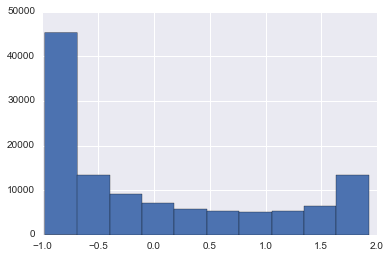

In [65]:
plt.hist(((np.array(data.acousticness)) - np.mean(np.array(data.acousticness)))/np.std(np.array(data.acousticness)))
plt.show()

### Danceability: 

All values are within 2-3 std dev of the mean.

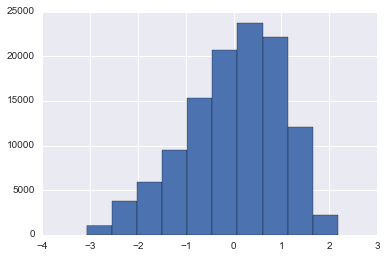

In [66]:
plt.hist(((np.array(data.danceability)) - np.mean(np.array(data.danceability)))/np.std(np.array(data.danceability)))
plt.show()

## Duration_ms:

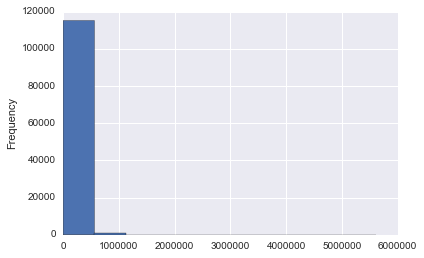

In [63]:
data.duration_ms.plot(kind='hist')
plt.show()

At first it looks like there are many outliers in the suration variable. But filtering the dataset to specifically 
look at some tracks with the long durations and bringing up these tracks on the Spotify app reveals that these long 
durations are actually correct. Below are a few examples of the songs that were checked:
    - Artist name: John, Tracks: Whatever, 5,040,048 ms (~84 mins) and Ever, 5,610,020 ms (~93.5 mins)
    - Artist name: Gentle Whispering, Track: Fluffy Sleepy Whispers, 2,097,245 (~35 mins)

In [46]:
data[(2000000 <= data.duration_ms) & (data.duration_ms <= 2100000)]

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
30517,Gentle Whispering,03JTIt71Ig9HDtOOh8oR5a,Fluffy Sleepy Whispers,0.0938,0.317,2097245,0.0308,0.000007,2,0.337,-48.914,0,0.0852,115.481,3,0.0295,34


In [48]:
data[5000000 <= (data.duration_ms )]

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
40818,John,2PZpYgAudxOgbHcy9RUKg2,Whatever,0.776,0.269,5040048,0.547,0.904,1,0.3720,-9.311,1,0.0459,128.804,5,0.1090,2
40821,John,3cNsPPdMfNUmMFIUImOt4P,Ever,0.259,0.896,5610020,0.367,0.104,1,0.0817,-10.278,1,0.0825,128.045,4,0.0568,0


## Energy:

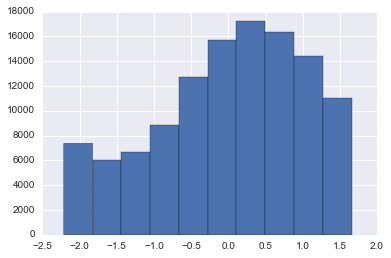

In [64]:
plt.hist(((np.array(data.energy)) - np.mean(np.array(data.energy)))/np.std(np.array(data.energy)))
plt.show()

## Instrumentalness:

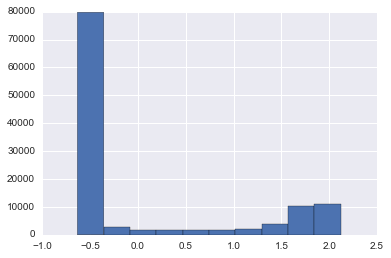

In [67]:
plt.hist(((np.array(data.instrumentalness)) - np.mean(np.array(data.instrumentalness)))/np.std(np.array(data.instrumentalness)))
plt.show()

## Liveness:

Liveness seems to have values more than 2 standard devs above the mean. However, looking at the definition of this variable, values above 0.8 are possible and in fact tracks with that value of liveness have a high probability of having been recorded in front of audience.

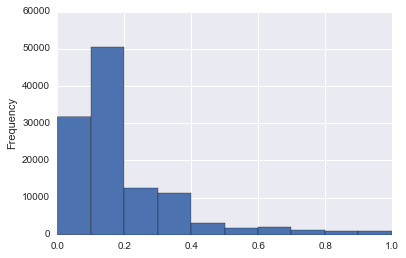

In [62]:
data.liveness.plot(kind='hist')
plt.show()

In [57]:
len(data.liveness[ 0.8 <= data.liveness])

2069

## Loudness:

There seems to be extremely small values of loudness. But the variable definition says values between -60 dBs and 0 dBs are common.

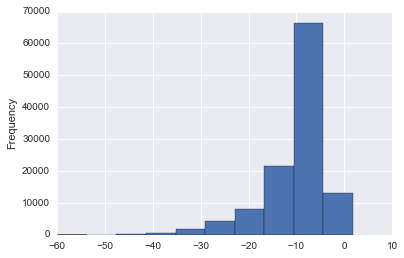

In [61]:
data.loudness.plot(kind='hist')
plt.show()

## Speechiness:

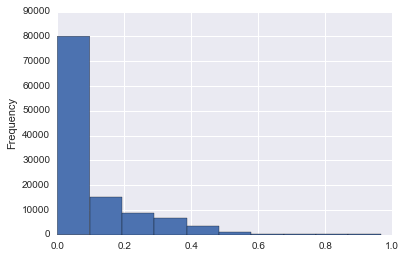

In [68]:
data.speechiness.plot(kind='hist')
plt.show()

## Tempo:

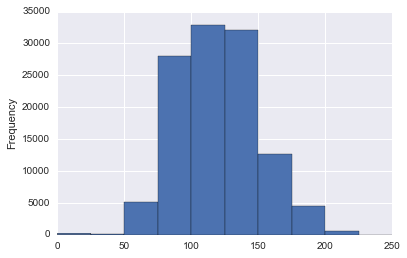

In [69]:
data.tempo.plot(kind='hist')
plt.show()

## Valence:

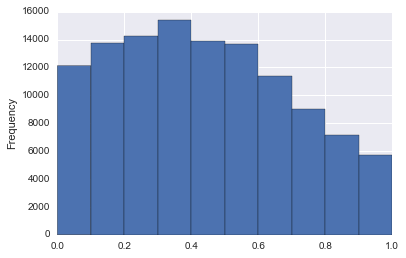

In [77]:
data.valence.plot(kind='hist')
plt.show()

## Popularity:

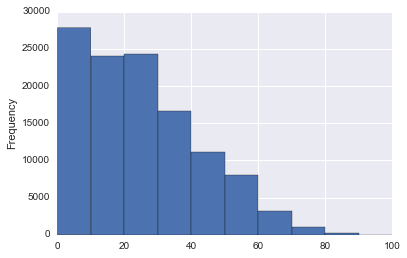

In [78]:
data.popularity.plot(kind='hist')
plt.show()

## Mode, Key and Time Signature:

Variables Mode, key and time_signature do not have an ordinal nature and would fit better as categorical variables in the context of this problem. So below they are converted into categories.  

In [71]:
# Question: do these need to be binary?
data['mode'] = data['mode'].astype('category')
data['key'] = data['key'].astype('category')
data['time_signature'] = data['time_signature'].astype('category')

In [74]:
data['mode'].value_counts(dropna=False).sort_index()

0    45672
1    70700
dtype: int64

In [75]:
data['key'].value_counts(dropna=False).sort_index()

0     13225
1     13743
2     11026
3      3764
4      8100
5      9592
6      7901
7     12378
8      8302
9     10812
10     8265
11     9264
dtype: int64

In [76]:
data['time_signature'].value_counts(dropna=False).sort_index()

0       261
1      1506
3     11007
4    100644
5      2954
dtype: int64